In [9]:
import json
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
plt.style.use("seaborn")

In [10]:
EXPERIMENTS_PATH = "/home/fabsam/Documenti/university/masterDegree/thesis/Decentralized-SmartGrid-ML/experiments/statistics/%s"
EXPERIMENT_NAME = "appliance_classification_task_with_impostor"

# VALIDATOR STATISTICS

In [11]:
validator_statistics_path = EXPERIMENTS_PATH % EXPERIMENT_NAME +"/validator/statistics.json"

In [12]:
with open(validator_statistics_path, "r") as file_read:
    validator_statistics = json.load(file_read)

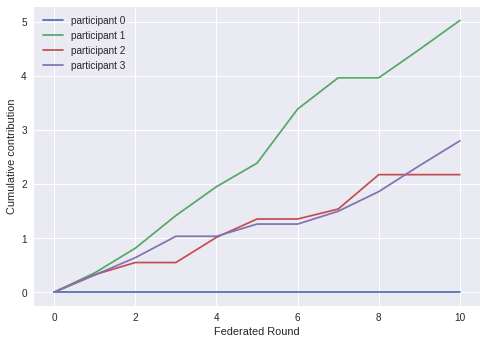

In [13]:
participant_ids2alpha = {participant_id: [0] for participant_id in validator_statistics["0"]["participant_ids"]}
for idx_round, stat_round in validator_statistics.items():
    for participant_id, contribution in zip(stat_round["participant_ids"], stat_round["alpha"]):
        participant_ids2alpha[participant_id].append(participant_ids2alpha[participant_id][-1] + contribution)
for participant_id, alpha_vector in sorted(participant_ids2alpha.items()):
    plt.plot(range(len(validator_statistics.keys()) + 1), alpha_vector, label="participant %d" % participant_id)
plt.xlabel("Federated Round")
plt.ylabel("Cumulative contribution")
plt.legend()
plt.show()

In [14]:
validation_loss_global_model = []
validation_score_global_model = []
test_loss_global_model = []
test_score_global_model = []
for idx_round, stat_round in validator_statistics.items():
    val_loss, val_score = stat_round["validation_results"]
    test_loss, test_score = stat_round["test_results"]
    validation_loss_global_model.append(val_loss)
    validation_score_global_model.append(val_score)
    test_loss_global_model.append(test_loss)
    test_score_global_model.append(test_score)

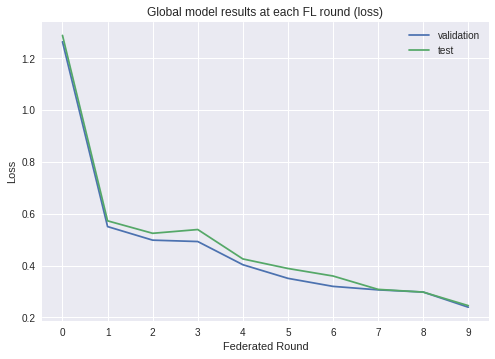

In [15]:
plt.plot(range(len(validator_statistics.keys())), validation_loss_global_model, label="validation")
plt.plot(range(len(validator_statistics.keys())), test_loss_global_model, label="test")
plt.xlabel("Federated Round")
plt.ylabel("Loss")
plt.title("Global model results at each FL round (loss)")
plt.xticks(range(len(validator_statistics.keys())))
plt.legend()
plt.show()

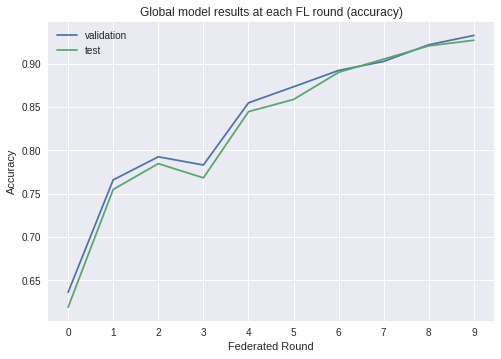

In [16]:
plt.plot(range(len(validator_statistics.keys())), validation_score_global_model, label="validation")
plt.plot(range(len(validator_statistics.keys())), test_score_global_model, label="test")
plt.xlabel("Federated Round")
plt.ylabel("Accuracy")
plt.title("Global model results at each FL round (accuracy)")
plt.xticks(range(len(validator_statistics.keys())))
plt.legend()
plt.show()

# PARTICIPANTS STATISTICS

In [17]:
ids_participants = [1, 2, 3]

In [18]:
participants_statistics_paths = [
    EXPERIMENTS_PATH % EXPERIMENT_NAME + "/participants/participant_%s/statistics.json" % participant_id for participant_id in ids_participants
]
participants_statistics = {}
for idx_participant, stat_path in zip(ids_participants, participants_statistics_paths):
    with open(stat_path, "r") as file_read:
        participants_statistics[idx_participant] = json.load(file_read)

In [19]:
def plot_metric_participant(idx_participant, metric, participants_statistics):
    losses = []
    for idx_round in participants_statistics[idx_participant].keys():
        losses.extend(participants_statistics[idx_participant][idx_round][metric])
    plt.plot(range(len(losses)), losses)
    labels_rounds = [" "] + ["end round %s" % idx_round for idx_round in participants_statistics[idx_participant].keys()]
    plt.xticks(range(0, len(losses) + 1, 8), labels_rounds, rotation=45)
    plt.title("Participant %s (%s)" % (idx_participant, metric))
    plt.ylabel(metric)
    plt.show()

In [20]:
def plot_metric_participants_comparison(metric, participants_statistics):
    for idx_participant in participants_statistics.keys():
        losses = []
        for idx_round in participants_statistics[idx_participant].keys():
            losses.extend(participants_statistics[idx_participant][idx_round][metric])
        plt.plot(range(len(losses)), losses, label="participant %s" % idx_participant)

    labels_rounds = [" "] + ["end round %s" % idx_round for idx_round in participants_statistics[idx_participant].keys()]
    plt.legend()
    plt.xticks(range(0, len(losses) + 1, 8), labels_rounds, rotation=45)
    plt.ylabel(metric)
    plt.title("Comparison among participants local training (%s)" % metric)

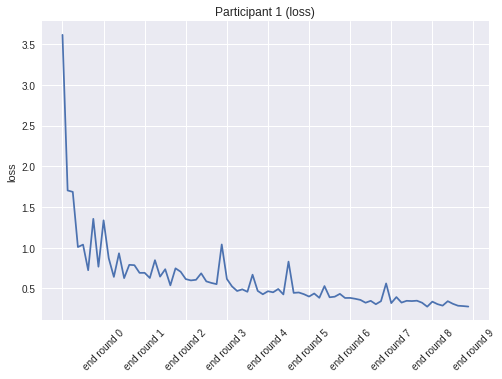

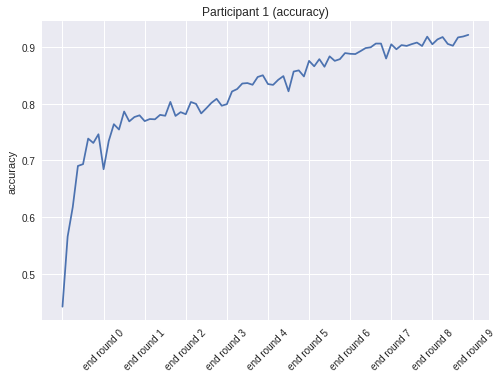

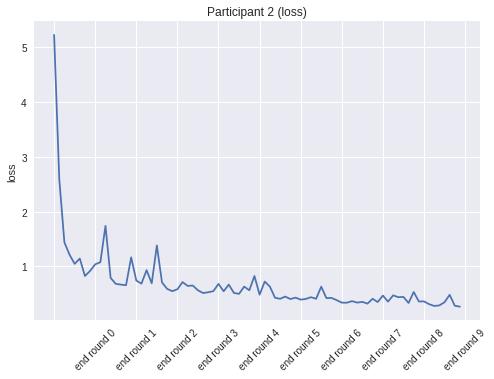

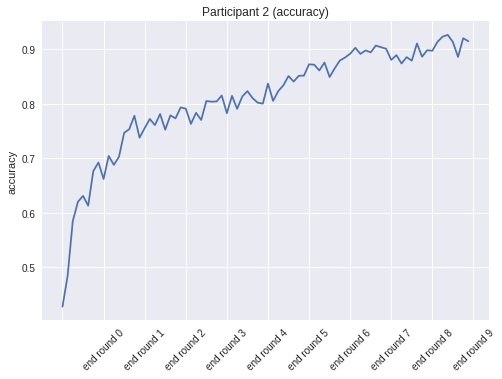

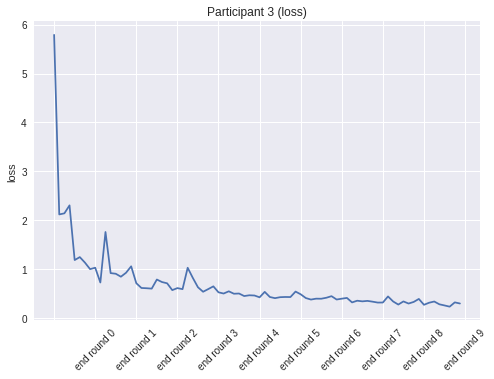

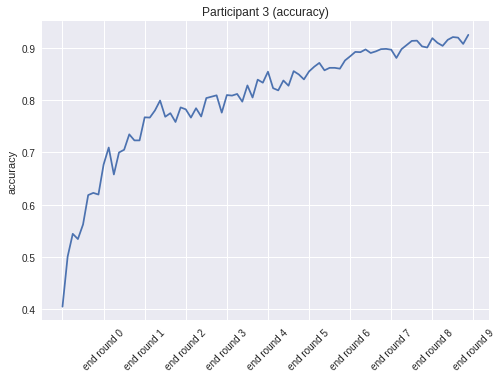

In [21]:
for id_participant in participants_statistics.keys():
    plot_metric_participant(id_participant, "loss", participants_statistics)
    plot_metric_participant(id_participant, "accuracy", participants_statistics)

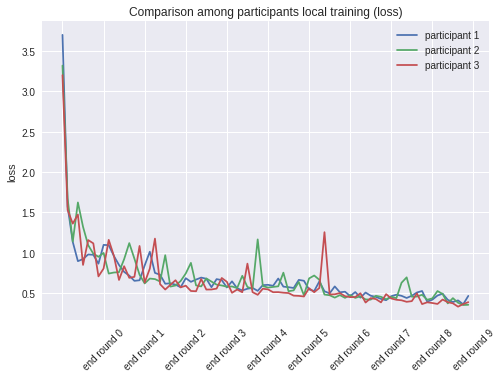

In [41]:
plot_metric_participants_comparison("loss", participants_statistics)